In [1]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

import datetime

from tensorflow import keras
import xgboost as xgb

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1

In [3]:
if model_type == 'NN':
    parameters = {'n_layers': 1, 'n_hidden_units': 82, 'batch_size': 2809, 'epochs': 10} # rmse = 1.699, r2 = 0.9983
    #parameters = {'n_layers': 1, 'n_hidden_units': 46, 'batch_size': 4298} # rmese = 2.06, r2 = 0.9976
elif model_type == 'XGBoost':
    parameters = {'learning_rate': 0.06600212850505194, 'subsample': 0.6242681848206246, 'colsample_bytree': 0.7982472652709917, 'num_boost_round': 160} # rmse = 4.5927
elif model_type == 'RandomForest':
    parameters = {'n_estimators': 150, 'max_depth': 64, 'max_samples': 0.8785156026362354}

In [4]:
if scale:
    model, val_index, scaler_x, scaler_y = final_train(data_dir, model_type, target, scale, parameters)
else:
    model, val_index = final_train(data_dir, model_type, target, scale, parameters)

[16:01:40] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:92.39311
[20]	train-rmse:32.48398
[40]	train-rmse:10.71354
[60]	train-rmse:5.31156
[80]	train-rmse:3.35193
[100]	train-rmse:2.77502
[120]	train-rmse:2.47803
[140]	train-rmse:2.27032
[159]	train-rmse:2.16085


In [5]:
sv = False
ld = False

In [6]:
if sv:
    if model_type == 'NN':
        model.save("../models/" + model_type + "_" + datetime.datetime.now().strftime("%Y%m%d-%H"))
    elif model_type == 'XGBoost':
        model.save_model("../models/" + model_type + "_" + datetime.datetime.now().strftime("%Y%m%d-%H") + ".json")
elif ld:
    if model_type == 'NN':
        model = keras.models.load_model("../models/NN_20220701-19")
    elif model_type == 'XGBoost':
        model = xgb.Booster()
        model.load_model("../models/XGBoost_20220707-12.json")

In [7]:
if scale:
    results = validate_model(model, model_type, data_dir, val_index, target, scale, scaler_x, scaler_y)
else:
    results = validate_model(model, model_type, data_dir, val_index, target, scale)

RMSE: 4.8713, R2: 0.9965


In [8]:
h_df = results['val_df']

In [9]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1

In [10]:
if model_type == 'NN':
    parameters = {'n_layers': 1, 'n_hidden_units': 82, 'batch_size': 2809, 'epochs': 10} # rmse = 1.699, r2 = 0.9983
    #parameters = {'n_layers': 1, 'n_hidden_units': 46, 'batch_size': 4298} # rmese = 2.06, r2 = 0.9976
elif model_type == 'XGBoost':
    parameters = {'learning_rate': 0.06600212850505194, 'subsample': 0.6242681848206246, 'colsample_bytree': 0.7982472652709917, 'num_boost_round': 160} # rmse = 4.5927
elif model_type == 'RandomForest':
    parameters = {'n_estimators': 150, 'max_depth': 64, 'max_samples': 0.8785156026362354}

In [11]:
if scale:
    model, val_index, scaler_x, scaler_y = final_train(data_dir, model_type, target, scale, parameters)
else:
    model, val_index = final_train(data_dir, model_type, target, scale, parameters)

2022-07-07 15:54:39.886009: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-07 15:54:39.958736: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
856/856 [==============================] - 2s 2ms/step - loss: 0.1691 - val_loss: 0.0019
Epoch 2/10
856/856 [==============================] - 1s 2ms/step - loss: 0.0014 - val_loss: 8.3429e-04
Epoch 3/10
856/856 [==============================] - 1s 2ms/step - loss: 7.3872e-04 - val_loss: 5.3493e-04
Epoch 4/10
856/856 [==============================] - 1s 2ms/step - loss: 4.8996e-04 - val_loss: 3.7599e-04
Epoch 5/10
856/856 [==============================] - 1s 2ms/step - loss: 3.4778e-04 - val_loss: 2.7504e-04
Epoch 6/10
856/856 [==============================] - 1s 2ms/step - loss: 2.5379e-04 - val_loss: 1.9035e-04
Epoch 7/10
856/856 [==============================] - 1s 2ms/step - loss: 1.6995e-04 - val_loss: 1.1212e-04
Epoch 8/10
856/856 [==============================] - 1s 2ms/step - loss: 9.8868e-05 - val_loss: 7.1090e-05
Epoch 9/10
856/856 [==============================] - 1s 2ms/step - loss: 6.6958e-05 - val_loss: 6.0750e-05
Epoch 10/10
856/856 [===================

In [12]:
if scale:
    results = validate_model(model, model_type, data_dir, val_index, target, scale, scaler_x, scaler_y)
else:
    results = validate_model(model, model_type, data_dir, val_index, target, scale)

RMSE: 2.2789, R2: 0.9978


In [13]:
T_df = results['val_df']

In [14]:
h_df['Tavg_hat'] = T_df['Tavg_hat']

In [15]:
target = 'h'

ValueError: x and y must have same first dimension, but have shapes (3621,) and (72000,)

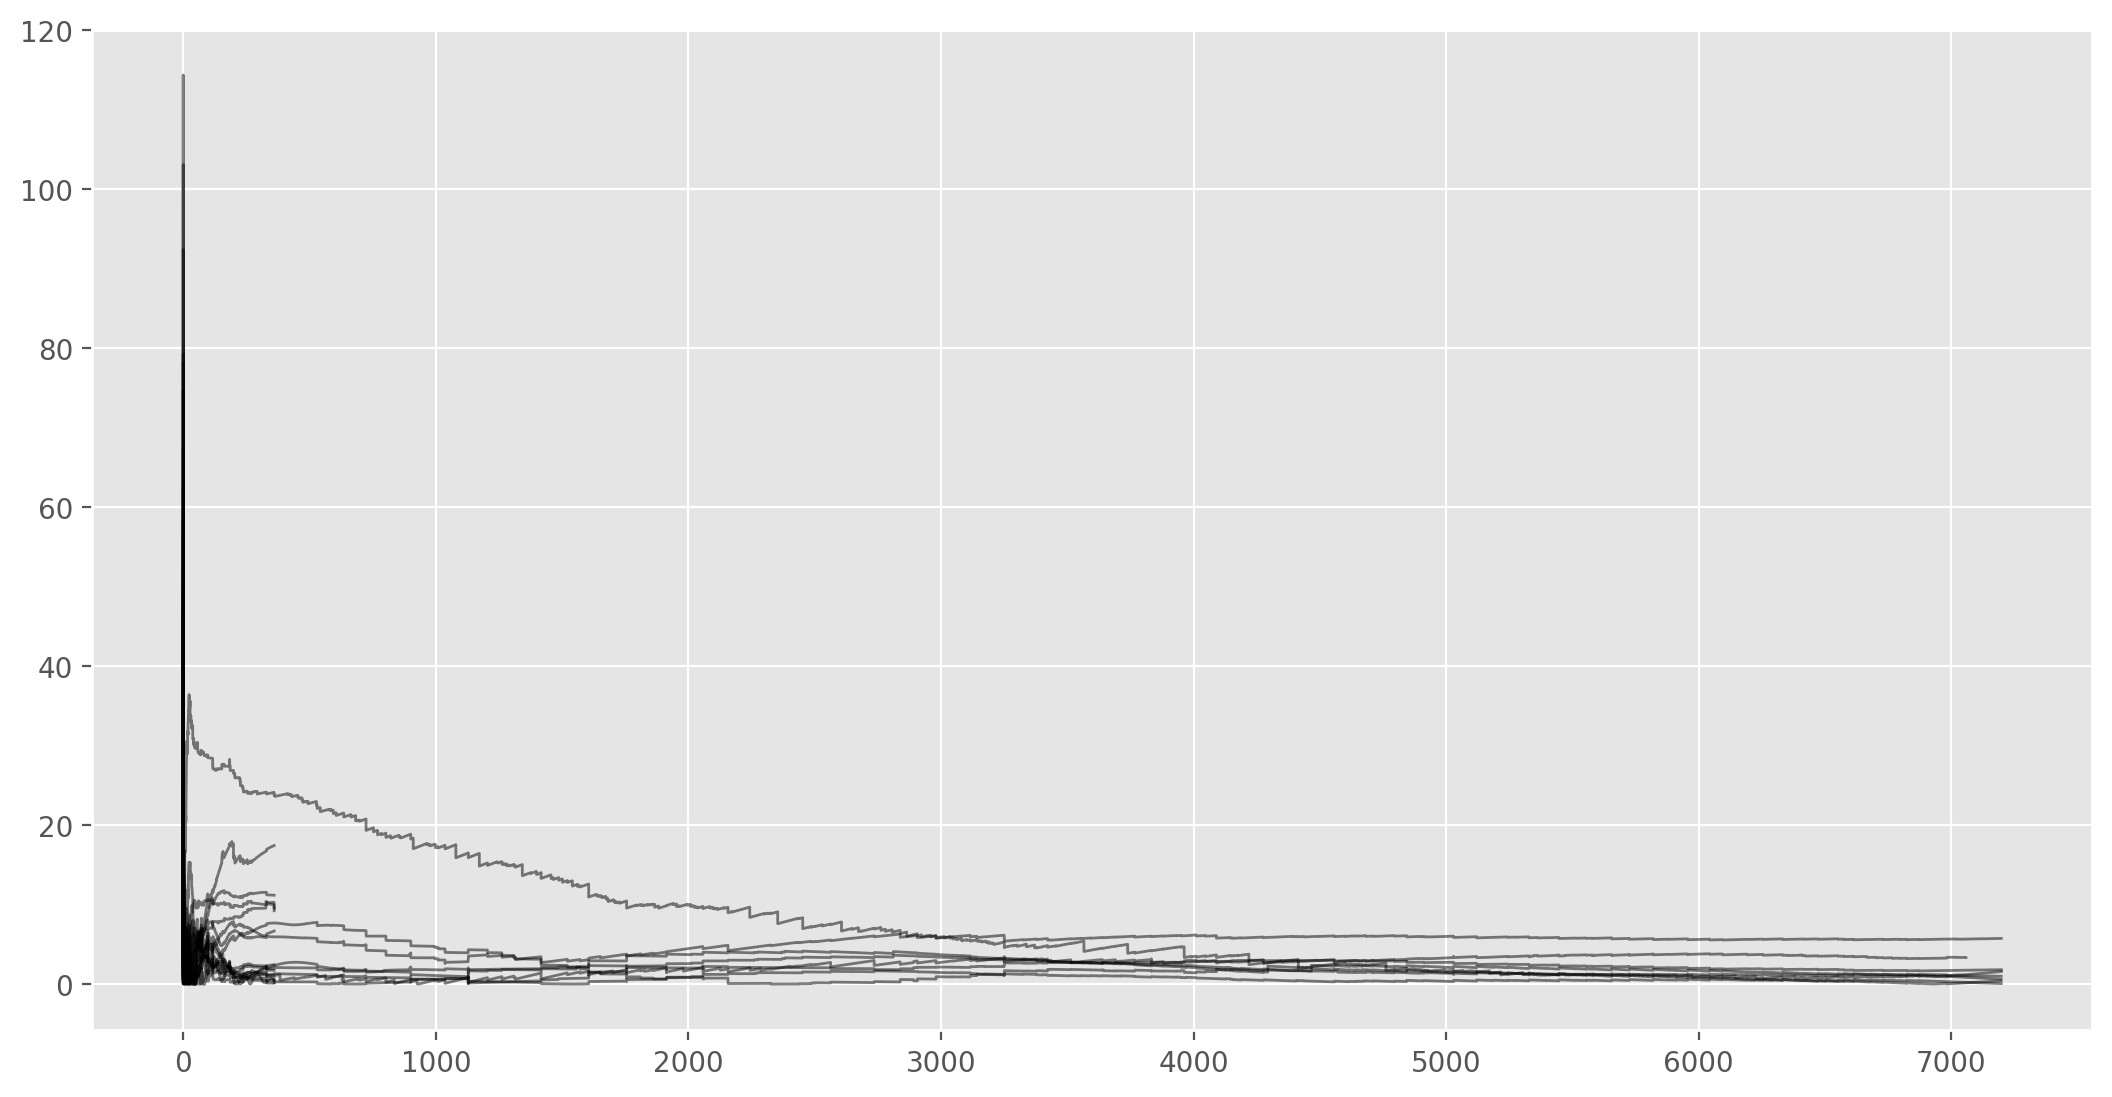

In [9]:
avg_error = plot_average_error(h_df, target=target)

<AxesSubplot:>

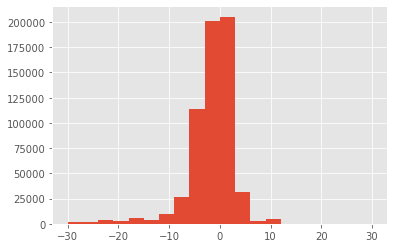

In [10]:
(h_df[target] - h_df[target+'_hat']).hist(bins=20, range=(-30, 30))

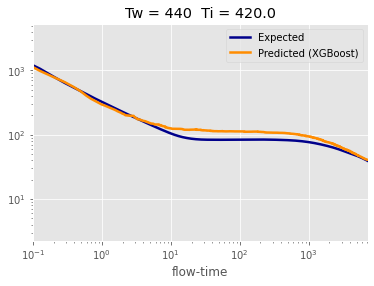

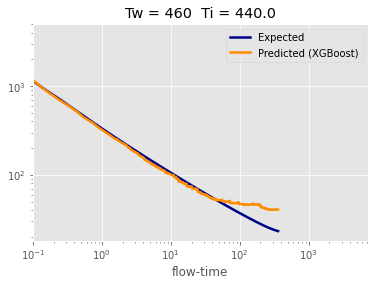

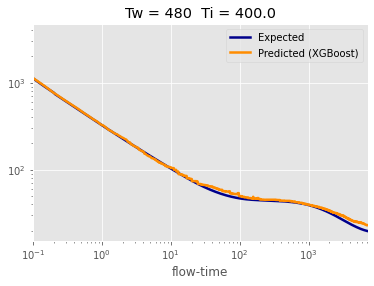

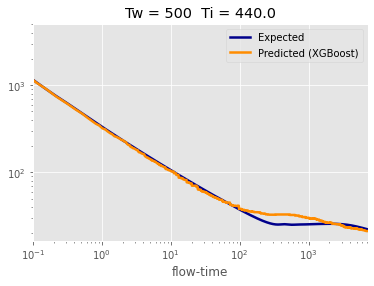

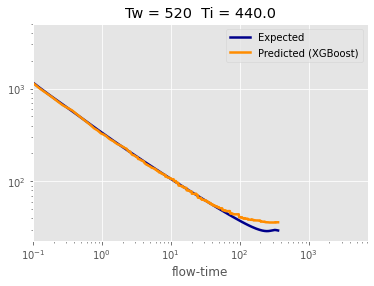

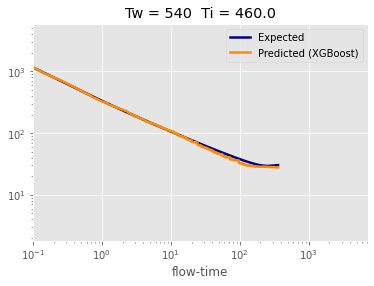

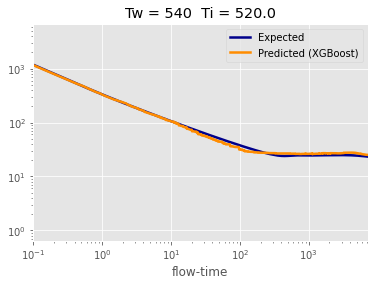

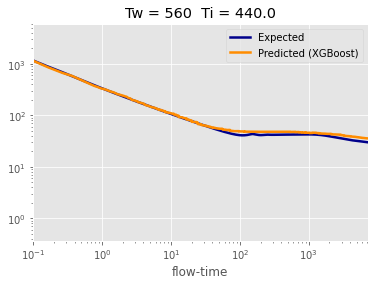

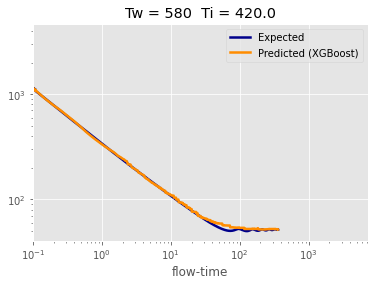

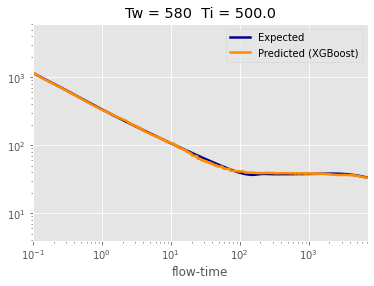

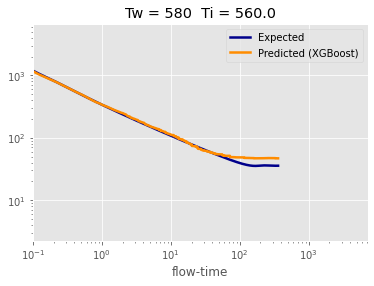

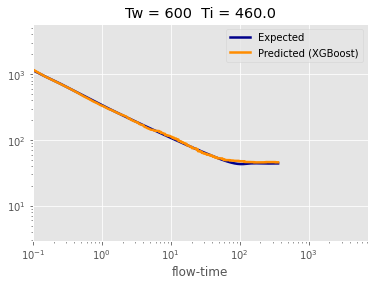

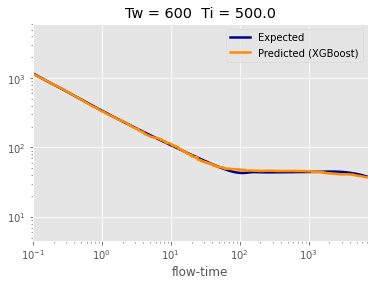

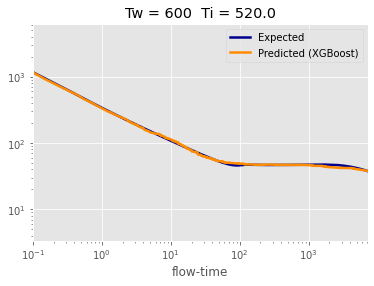

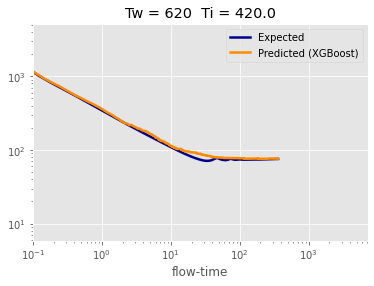

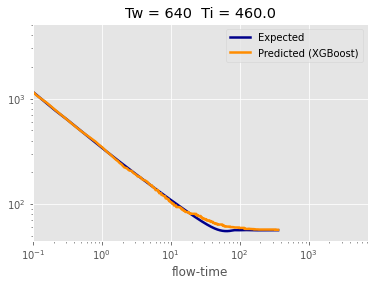

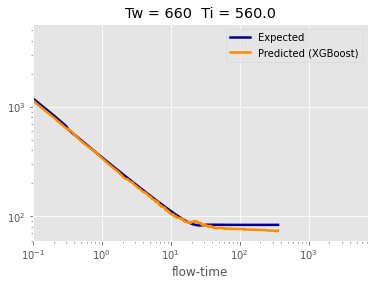

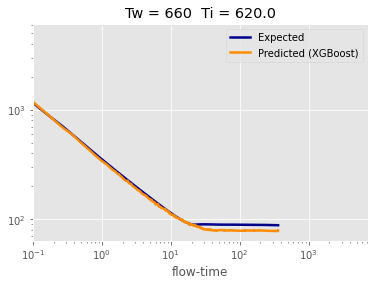

In [11]:
plot_test_results(h_df, model_type, target)

In [12]:
#h_df['Tavg_hat'] = h_df['Tavg']

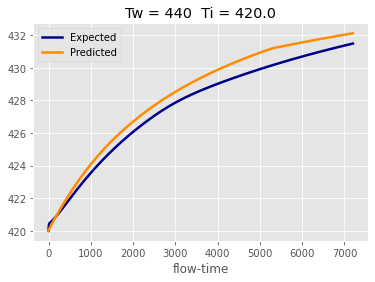

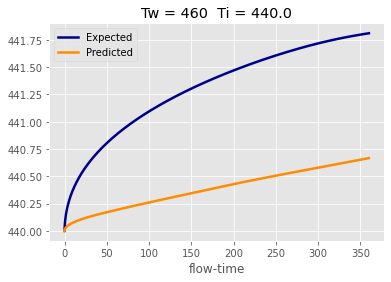

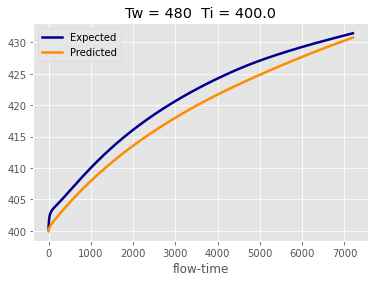

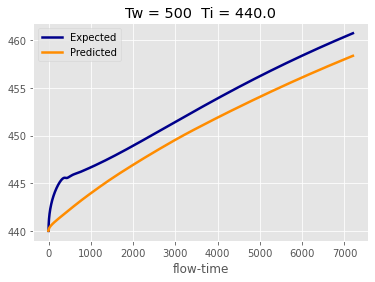

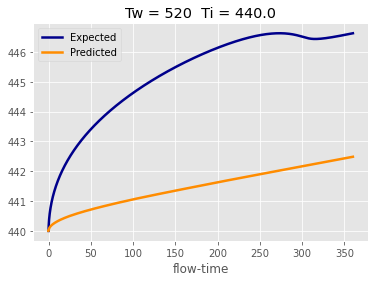

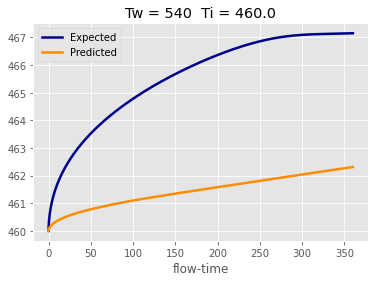

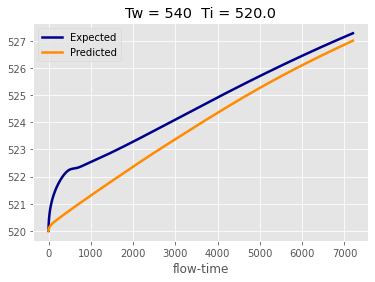

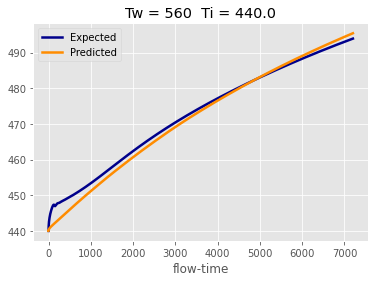

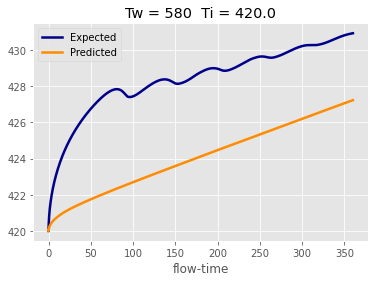

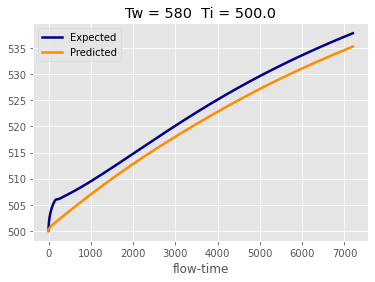

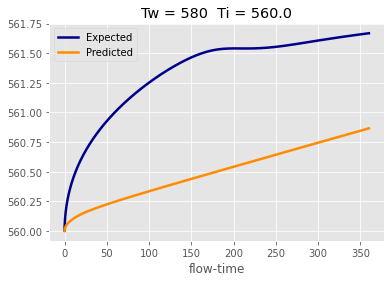

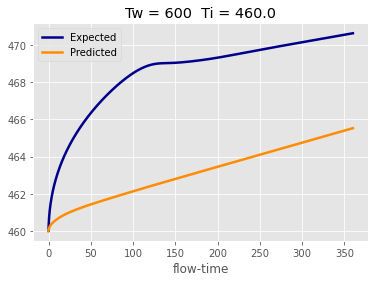

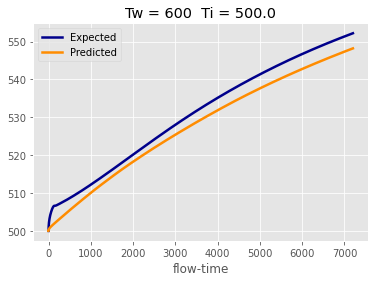

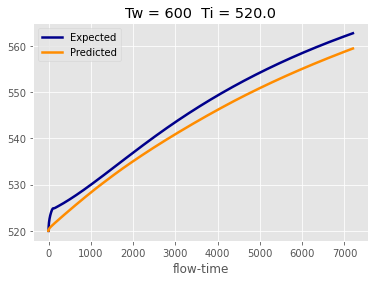

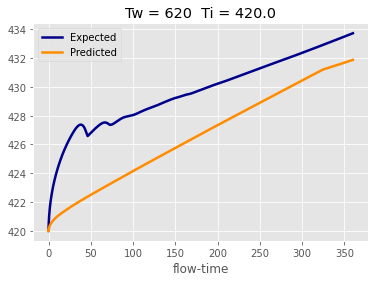

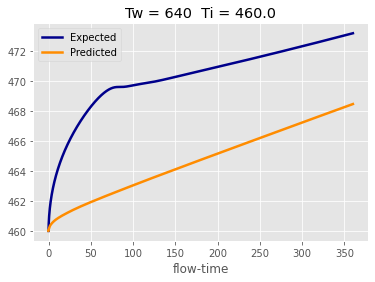

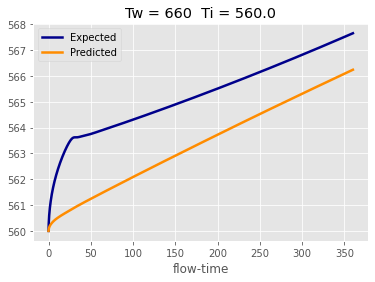

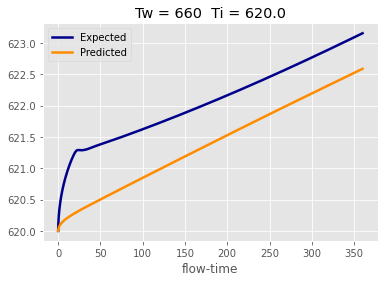

In [13]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(val_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(h_df, plot=True)

In [14]:
print(rmse)

2.3095882116193867


In [15]:
print(r2)

0.9977535844308656
